In [38]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [39]:
# Importing the dataset
dataset = pd.read_csv('spam2.csv')
dataset


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

In [40]:
#checking for null values in the dataset
print(dataset.isnull().sum())

word_freq_make                 0
word_freq_address              0
word_freq_all                  0
word_freq_3d                   0
word_freq_our                  0
word_freq_over                 0
word_freq_remove               0
word_freq_internet             0
word_freq_order                0
word_freq_mail                 0
word_freq_receive              0
word_freq_will                 0
word_freq_people               0
word_freq_report               0
word_freq_addresses            0
word_freq_free                 0
word_freq_business             0
word_freq_email                0
word_freq_you                  0
word_freq_credit               0
word_freq_your                 0
word_freq_font                 0
word_freq_000                  0
word_freq_money                0
word_freq_hp                   0
word_freq_hpl                  0
word_freq_george               0
word_freq_650                  0
word_freq_lab                  0
word_freq_labs                 0
word_freq_

In [41]:
dataset.shape #for the data count and attribute details

(4601, 58)

In [42]:
#print all spam emails
spam_data = dataset[dataset.iloc[:, -1] == 1].shape[0]
print("No. of spam emails :", spam_data)

non_spam_data = dataset[dataset.iloc[:, -1] == 0].shape[0]
print("No. of non-spam emails : ", non_spam_data)

No. of spam emails : 1813
No. of non-spam emails :  2788


principal Componenet Analysis
as there are more attributes

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
#feature scaling process
scaler=StandardScaler()
F_scaled_dataset=scaler.fit_transform(dataset)
F_scaled_dataset_table=pd.DataFrame(data=F_scaled_dataset, columns= dataset.columns)
F_scaled_dataset_table



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1.240074
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1.240074
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1.240074
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1.240074
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1.240074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.672880,-0.165072,0.673183,-0.0469,-0.464314,0.781971,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,0.343917,-0.155198,-0.329912,-0.308355,-0.103048,-0.127640,-0.252336,-0.322110,-0.806404
4597,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.102907,-0.308355,-0.103048,-0.114623,-0.247205,-0.444165,-0.806404
4598,0.640128,-0.165072,0.038373,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,0.260533,2.141746,-0.155198,-0.329912,-0.308355,-0.103048,-0.119382,-0.236941,-0.272628,-0.806404
4599,2.801763,-0.165072,-0.556761,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.303450,-0.155198,-0.329912,-0.308355,-0.103048,-0.127483,-0.242073,-0.338604,-0.806404


In [45]:
F_scaled_dataset_table.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,...,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03
mean,4.844708e-15,-9.171827e-16,-4.647855e-15,-2.025297e-15,4.101503e-16,6.654727e-15,-1.007371e-14,-7.314056e-16,5.750405e-15,-1.858689e-15,...,5.026818e-15,-9.130806e-16,1.540703e-16,-5.408971e-15,1.190610e-14,2.507654e-16,5.297599e-16,1.560007e-16,1.989160e-16,4.847966e-15
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,...,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-3.424337e-01,-1.650719e-01,-5.567606e-01,-4.689958e-02,-4.643144e-01,-3.502662e-01,-2.917939e-01,-2.625616e-01,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-5.143065e-01,-1.551977e-01,-3.299123e-01,-3.083549e-01,-1.030484e-01,-1.321161e-01,-2.625994e-01,-4.656073e-01,-8.064037e-01
25%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-4.689958e-02,-4.643144e-01,-3.502662e-01,-2.917939e-01,-2.625616e-01,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-5.143065e-01,-1.551977e-01,-3.299123e-01,-3.083549e-01,-1.030484e-01,-1.135824e-01,-2.369413e-01,-4.095278e-01,-8.064037e-01
50%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-4.689958e-02,-4.643144e-01,-3.502662e-01,-2.917939e-01,-2.625616e-01,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-2.738561e-01,-1.551977e-01,-3.299123e-01,-3.083549e-01,-1.030484e-01,-9.189671e-02,-1.907567e-01,-3.105639e-01,-8.064037e-01
75%,-3.424337e-01,-1.650719e-01,2.764271e-01,-4.689958e-02,1.007920e-01,-3.502662e-01,-2.917939e-01,-2.625616e-01,-3.233024e-01,-1.231813e-01,...,-1.584534e-01,1.811501e-01,-1.551977e-01,5.631450e-02,-9.684841e-02,-1.030484e-01,-4.682327e-02,-4.707129e-02,-2.851691e-02,1.240074e+00
max,1.452700e+01,1.090096e+01,9.560519e+00,3.064128e+01,1.440691e+01,2.112571e+01,1.828261e+01,2.744125e+01,1.855779e+01,2.782844e+01,...,1.785384e+01,3.556066e+01,3.715432e+01,3.949191e+01,2.410845e+01,4.608659e+01,3.458704e+01,5.099205e+01,2.566085e+01,1.240074e+00


In [46]:
from sklearn.decomposition import PCA

In [47]:
pca=PCA(n_components=5)
New_dataset=pca.fit_transform(F_scaled_dataset)
New_dataset.shape

(4601, 5)

In [48]:
pca.explained_variance_ratio_

array([0.11549281, 0.06372187, 0.0346963 , 0.02783112, 0.02681454])

In [49]:
#details of the final dataset after principal component analysis
New_Dataset=pd.DataFrame(data=New_dataset,columns=['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5'])


In [50]:
New_Dataset.head(20)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,-0.899005,0.361066,-0.668065,0.363061,-0.263454
1,-1.434347,2.225016,0.106312,-0.435848,-0.189267
2,-1.831251,4.828961,3.521249,-1.099644,0.762213
3,-0.992334,0.787752,-0.629473,0.014461,-0.123440
4,-0.993228,0.787010,-0.631528,0.014356,-0.123537
5,-0.649466,0.007900,-0.515226,0.514730,0.156430
6,-1.237704,1.327004,-1.722557,-0.137529,0.844822
7,-0.661544,0.010842,-0.560401,0.503730,0.156800
8,-1.577184,3.621178,1.675196,-0.353783,1.402414
9,-1.025128,0.745957,-0.030539,0.356213,-0.191078


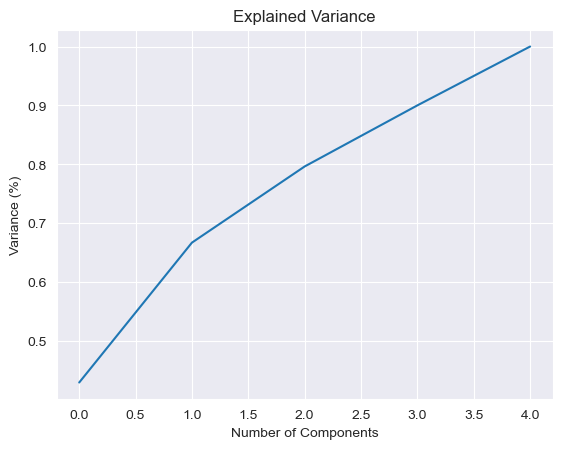

In [51]:
principalComponents = pca.fit_transform(New_Dataset)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X = New_Dataset.iloc[:, :-1],  # Features (all columns except the last one)
y = dataset.iloc[:, -1],   # Target variable (last column)
X_train, X_test, y_train, y_test = train_test_split(New_Dataset.iloc[:, :-1], dataset.iloc[:, -1], test_size=0.25, random_state=2)

In [53]:
# Print the shapes of the train test data
print("Training subset shape:", X_train.shape, y_train.shape)
print("Testing subset shape:", X_test.shape, y_test.shape)

Training subset shape: (3450, 4) (3450,)
Testing subset shape: (1151, 4) (1151,)


In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


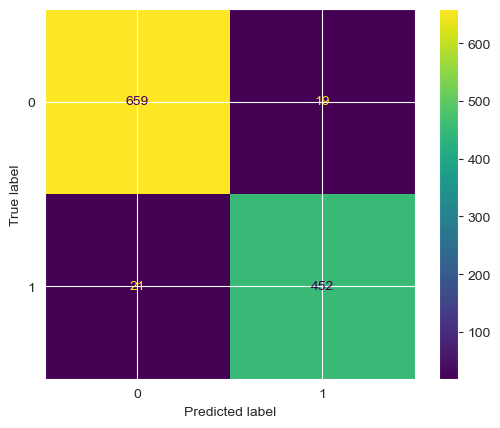

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = knn.predict(X_test)

# Creating confusion matrix
con_mtrx = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=con_mtrx).plot();

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       678
           1       0.96      0.96      0.96       473

    accuracy                           0.97      1151
   macro avg       0.96      0.96      0.96      1151
weighted avg       0.97      0.97      0.97      1151

